### 加载数据集

In [313]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import tensorflow as tf

In [314]:
breast_dataset = load_breast_cancer()

In [315]:
breast = pd.DataFrame(breast_dataset.data, columns=breast_dataset.feature_names)

In [316]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [317]:
breast['y'] = breast_dataset.target

In [318]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [319]:
breast.shape

(569, 31)

In [320]:
breast.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')

<AxesSubplot:>

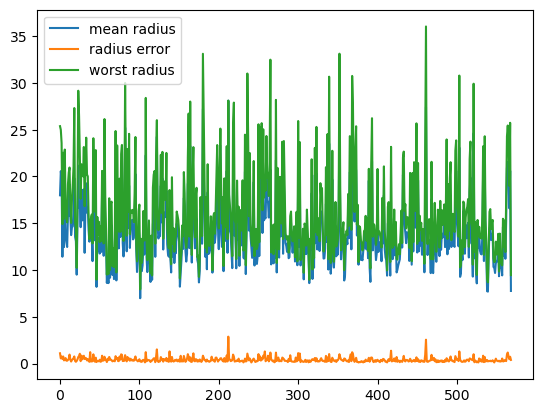

In [321]:
breast[['mean radius','radius error','worst radius']].plot()

<AxesSubplot:>

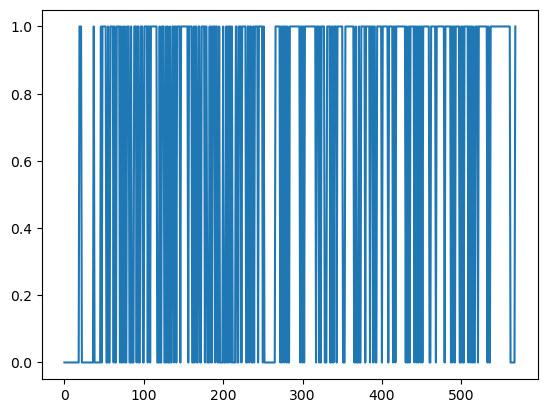

In [379]:
breast['y'].plot()

In [322]:
set(breast['y'])

{0, 1}

### 划分数据集 

In [323]:
test_dataset = breast.iloc[-int(0.2*len(breast)):,:]
train_dataset = breast.iloc[:-int(0.2*len(breast)),:]

In [324]:
print(test_dataset.shape, train_dataset.shape)

(113, 31) (456, 31)


### 读取数据集

In [349]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=len(data_arrays))
    dataset = dataset.batch(batch_size)
    return dataset

In [350]:
batch_size = 10
data_iter = load_array((train_dataset.iloc[:,:-1],train_dataset.iloc[:,-1]), batch_size, True)

In [351]:
for data in data_iter:
    print(data)
    break

(<tf.Tensor: shape=(10, 30), dtype=float64, numpy=
array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
        1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01, 8.758e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-

### 定义模型

In [380]:
net = tf.keras.Sequential()
initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=0.01)
net.add(tf.keras.layers.Dense(1, kernel_initializer=initializer, 
                                 kernel_regularizer=tf.keras.regularizers.L1(0.02),
                                 bias_regularizer=tf.keras.regularizers.L2(0.01),
                                 activation='sigmoid'))
# net.add(tf.keras.layers.Activation('sigmoid'))

### 定义损失函数

In [381]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### 定义优化算法

In [382]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

### 训练

In [383]:
num_epochs = 30

In [384]:
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            y_pred = net(X, training=True) 
            l =loss(y_true=tf.reshape(y,y_pred.shape), y_pred=y_pred)
        grads = tape.gradient(l, net.trainable_variables)
        optimizer.apply_gradients(zip(grads, net.trainable_variables))
    l = loss(y_pred=net(X), y_true=y)
    print('epoch:{}, loss:{}'.format(epoch+1, float(l)))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch:1, loss:0.6466453671455383
epoch:2, loss:0.4799528121948242
epoch:3, loss:0.47993430495262146
epoch:4, loss:0.4799603521823883
epoch:5, loss:0.6465969681739807
epoch:6, loss:0.6465963125228882
epoch:7, loss:0.47992920875549316
epoch:8, loss:0.4799295961856842
epoch:9, loss:0.47992923855781555
epoch:10, loss:0.4799290895462036
epoch:11, loss:0.4799288809299469
epoch:12, loss:0.646595299243927
epoch:13, loss:0.6465952396392822
epoch:14, loss:0.6465951800346375
epoch:15, loss:0.6465951800346375
epoch

In [242]:
test = load_array(test_dataset, batch_size=test_dataset.shape[0], is_train=False)

In [243]:
test = next(iter(test))

In [244]:
X_test = test[:,:-1]
y_test = test[:,-1]

In [245]:
X_test

<tf.Tensor: shape=(113, 30), dtype=float64, numpy=
array([[1.163e+01, 2.929e+01, 7.487e+01, ..., 6.835e-02, 2.884e-01,
        7.220e-02],
       [1.321e+01, 2.525e+01, 8.410e+01, ..., 6.005e-02, 2.444e-01,
        6.788e-02],
       [1.300e+01, 2.513e+01, 8.261e+01, ..., 5.921e-02, 2.306e-01,
        6.291e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])>

In [246]:
y_test

<tf.Tensor: shape=(113,), dtype=float64, numpy=
array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.])>

In [247]:
net(X_test)

<tf.Tensor: shape=(113, 1), dtype=float32, numpy=
array([[8.27601523e-22],
       [1.19522604e-26],
       [3.53729082e-26],
       [3.48553973e-15],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.98735677e-31],
       [5.56348917e-21],
       [5.99909074e-28],
       [2.51906009e-29],
       [5.77290182e-28],
       [9.81534050e-16],
       [0.00000000e+00],
       [1.21327342e-21],
       [6.82669539e-16],
       [3.26623945e-23],
       [5.09139973e-36],
       [2.30591063e-23],
       [1.64381405e-18],
       [1.86227380e-25],
       [7.06292401e-33],
       [6.35971258e-30],
       [3.66250211e-20],
       [0.00000000e+00],
       [4.58408429e-23],
       [1.44656673e-32],
       [1.77322046e-27],
       [1.60025411e-28],
       [5.82144098e-36],
       [3.18976006e-24],
       [7.93611868e-34],
       [0.00000000e+00],
       [2.43275186e-22],
       [0.00000000e+00],
       [4.20947716e-25],
       [0.00000000e+00],
       [0.00000000e+00],
       [5.55146284e-23],
